In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import BayesianRidge, LogisticRegression
from sklearn.decomposition import PCA
from ipywidgets import interact
from sklearn.utils.validation import check_random_state
from sklearn.model_selection import train_test_split
from sklearn import datasets

##**$Miniproyecto$ $2$ $-$ $Tratamiento$ $de$ $señales$ $3$**

Manuel José Bothert Martínez, Yeison Monsalve Sanchez, Juan Manuel Marín Gallego, Alejandro Estrada Moscoso

In [ ]:
data = pd.read_csv('Dataframe_Miniproyecto_1.csv') # Cargamos el dataframe.
data[20:26]

,Pot(SSA1),F_Pmax(SSA1),Energia(SSA1),Media(SSA1),Var(SSA1),Max(SSA1),Min(SSA1),Pot(SSA2),F_Pmax(SSA2),Energia(SSA2),Media(SSA2),Var(SSA2),Max(SSA2),Min(SSA2),Pot(SSA3),F_Pmax(SSA3),Energia(SSA3),Media(SSA3),Var(SSA3),Max(SSA3),Min(SSA3),Pot(SSA4),F_Pmax(SSA4),Energia(SSA4),Media(SSA4),Var(SSA4),Max(SSA4),Min(SSA4),Pot(SSA5),F_Pmax(SSA5),Energia(SSA5),Media(SSA5),Var(SSA5),Max(SSA5),Min(SSA5),Tipo
20,0.035135,1.367188,11.001499,0.003284,0.000032,0.035135,0.000853,0.003019,12.500000,0.552222,0.001389,7.253244e-07,0.003019,0.000551,0.001652,21.484375,0.134158,0.000553,2.636978e-07,0.001652,0.000040,0.001226,33.007812,0.084436,0.000422,1.697307e-07,0.001226,0.000015,0.002252,49.218750,0.115062,0.000379,2.586398e-07,0.002252,0.000004,Tele
21,0.029894,1.367188,4.606804,0.002967,0.000021,0.029894,0.000829,0.007911,23.632812,0.936704,0.000954,1.189736e-06,0.007911,0.000205,0.006765,23.632812,0.729775,0.000880,6.813874e-07,0.006765,0.000009,0.016724,49.414062,0.898656,0.001075,3.858378e-06,0.016724,0.000002,0.005118,36.132812,0.422817,0.001137,6.239358e-07,0.005118,0.000426,Loc
22,0.034312,1.367188,5.915285,0.003285,0.000030,0.034312,0.000892,0.003664,39.257812,0.585503,0.001027,5.236090e-07,0.003664,0.000395,0.004341,49.414062,0.357888,0.000757,5.939477e-07,0.004341,0.000010,0.003606,16.406250,0.349304,0.001000,5.822095e-07,0.003606,0.000177,0.005411,49.414062,0.263703,0.000745,5.959332e-07,0.005411,0.000022,Loc
23,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
24,0.041829,49.218750,4.208005,0.002187,0.000024,0.041829,0.000035,0.019187,1.367188,1.921571,0.001928,9.163823e-06,0.019187,0.000308,0.009791,37.109375,0.923061,0.001577,3.721770e-06,0.009791,0.000115,0.005253,25.976562,0.418438,0.001253,1.696167e-06,0.005253,0.000030,0.007639,13.671875,0.423201,0.001322,2.373468e-06,0.007639,0.000154,Loc
25,0.033841,1.367188,5.774650,0.003245,0.000029,0.033841,0.000847,0.004781,49.023438,0.267329,0.001137,3.418100e-07,0.004781,0.000107,0.007078,49.023438,0.305427,0.000933,7.856088e-07,0.007078,0.000260,0.003486,35.937500,0.149797,0.000642,3.261934e-07,0.003486,0.000010,0.002687,29.101562,0.140041,0.000618,3.524628e-07,0.002687,0.000007,Loc


In [ ]:
dataSismo = np.asarray(data.drop('Tipo',1))
Tipo = data['Tipo'].tolist()

# Creamos una lista de etiquetas numéricas.
Tags = ["" for x in range(63)]
for i in range(0,21,1):
  Tags[i] = 0       # El valor de 0 corresponde a los telesismos
for j in range(21,42,1):
  Tags[j] = 1       # El valor de 1 corresponde a los sismos locales
for l in range(42,63,1):
  Tags[l] = 2       # El valor de 2 corresponde a los sismos regionales

In [ ]:
pca = PCA(n_components = 35)  # project from 64 to 2 dimensions
projectedZ = pca.fit_transform(dataSismo) # Entrenamos el modelo PCA (Calculamos los parámetros de proyección W, autovals, autovecs)
BasisW = pca.components_
print("Dataframe size: ", data.shape)
print("Z Projection size: ", projectedZ.shape)
print("PCA explained variance: ", pca.explained_variance_)
print("W Projection size: ", BasisW.shape)

Dataframe size:  (63, 36)
Z Projection size:  (63, 35)
PCA explained variance:  [6.53777632e+02 4.85272696e+02 2.68812864e+02 1.61791766e+02
 8.23025263e+01 4.70666973e+01 1.99137523e+01 1.56547842e+00
 7.11385250e-02 4.94515873e-02 4.33659936e-05 1.96429931e-05
 1.09655388e-05 3.73777252e-06 1.44879301e-06 4.47993757e-08
 3.27131679e-08 1.83689989e-08 1.49092002e-08 7.81468676e-09
 2.81256345e-09 2.17638349e-09 8.56512189e-10 4.88184443e-10
 3.29702931e-10 5.72923405e-12 2.69879454e-13 1.17822922e-13
 4.65010642e-14 2.02280611e-15 2.83119639e-30 2.83119639e-30
 2.83119639e-30 2.83119639e-30 2.62999461e-31]
W Projection size:  (35, 35)


(35,) 
 Explained variance 0.9999298688191215


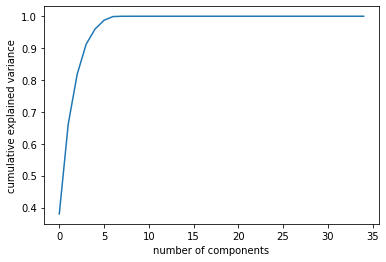

In [ ]:
varExp = pca.explained_variance_ratio_
print(varExp.shape,'\n Explained variance',np.sum(varExp[:8]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Observación: A partir de la grafica anterior se puede observar que con 7 u 8 componentes del total, estamos cumpliendo con mas del 98% de la varianza. Por esta razon solo con valores menores a 7 u 8 se lograran observar cambios significativos en los datos proyectados. 

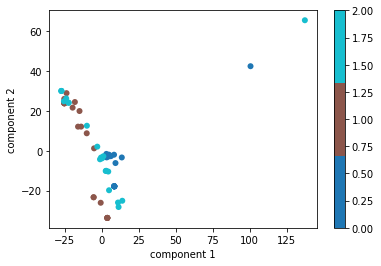

In [ ]:
plt.scatter(projectedZ[:, 0], projectedZ[:, 1], c=Tags, edgecolor='none', cmap=plt.cm.get_cmap('tab10', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

In [ ]:
def projectedZ_Components(n,data):
  pca = PCA(n_components = n)
  projectedZ = pca.fit_transform(data)
  BasisW = pca.components_
  print("Dataframe size: ", data.shape)
  print("Z Projection size: ", projectedZ.shape)
  print("PCA explained variance: ", pca.explained_variance_)
  print("W Projection size: ", BasisW.shape)
  return projectedZ

Dataframe size:  (63, 35)
Z Projection size:  (63, 2)
PCA explained variance:  [653.77763169 485.27269569]
W Projection size:  (2, 35)


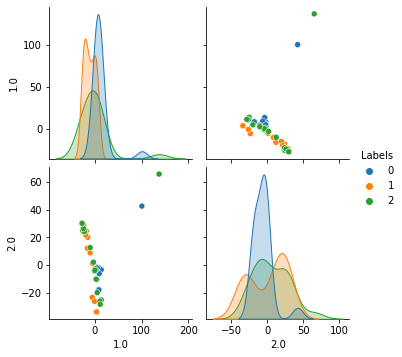

In [ ]:
n = 2
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 35)
Z Projection size:  (63, 4)
PCA explained variance:  [653.77763169 485.27269569 268.81286431 161.7917661 ]
W Projection size:  (4, 35)


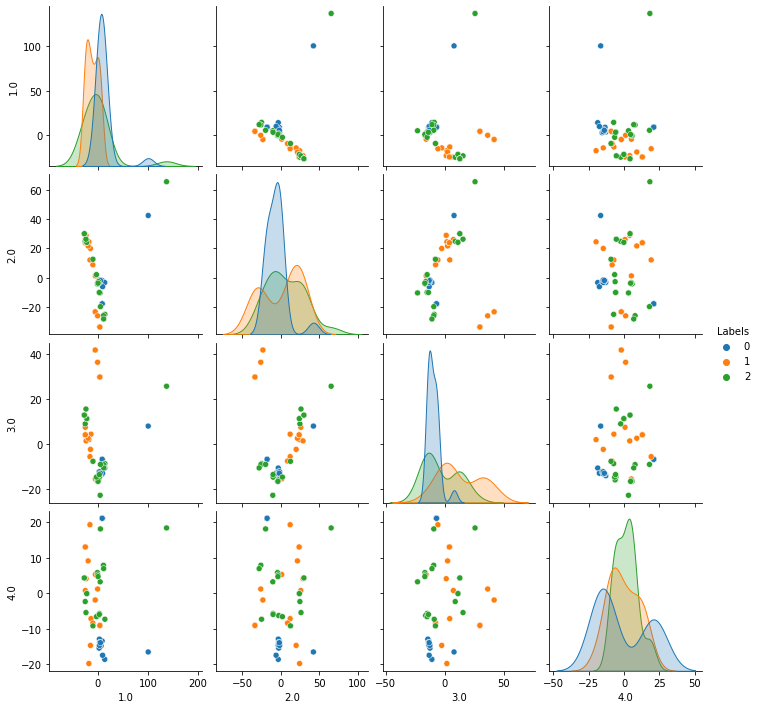

In [ ]:
n = 4
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Dataframe size:  (63, 35)
Z Projection size:  (63, 8)
PCA explained variance:  [653.77763169 485.27269569 268.81286431 161.7917661   82.30252629
  47.06669731  19.91375227   1.56547842]
W Projection size:  (8, 35)


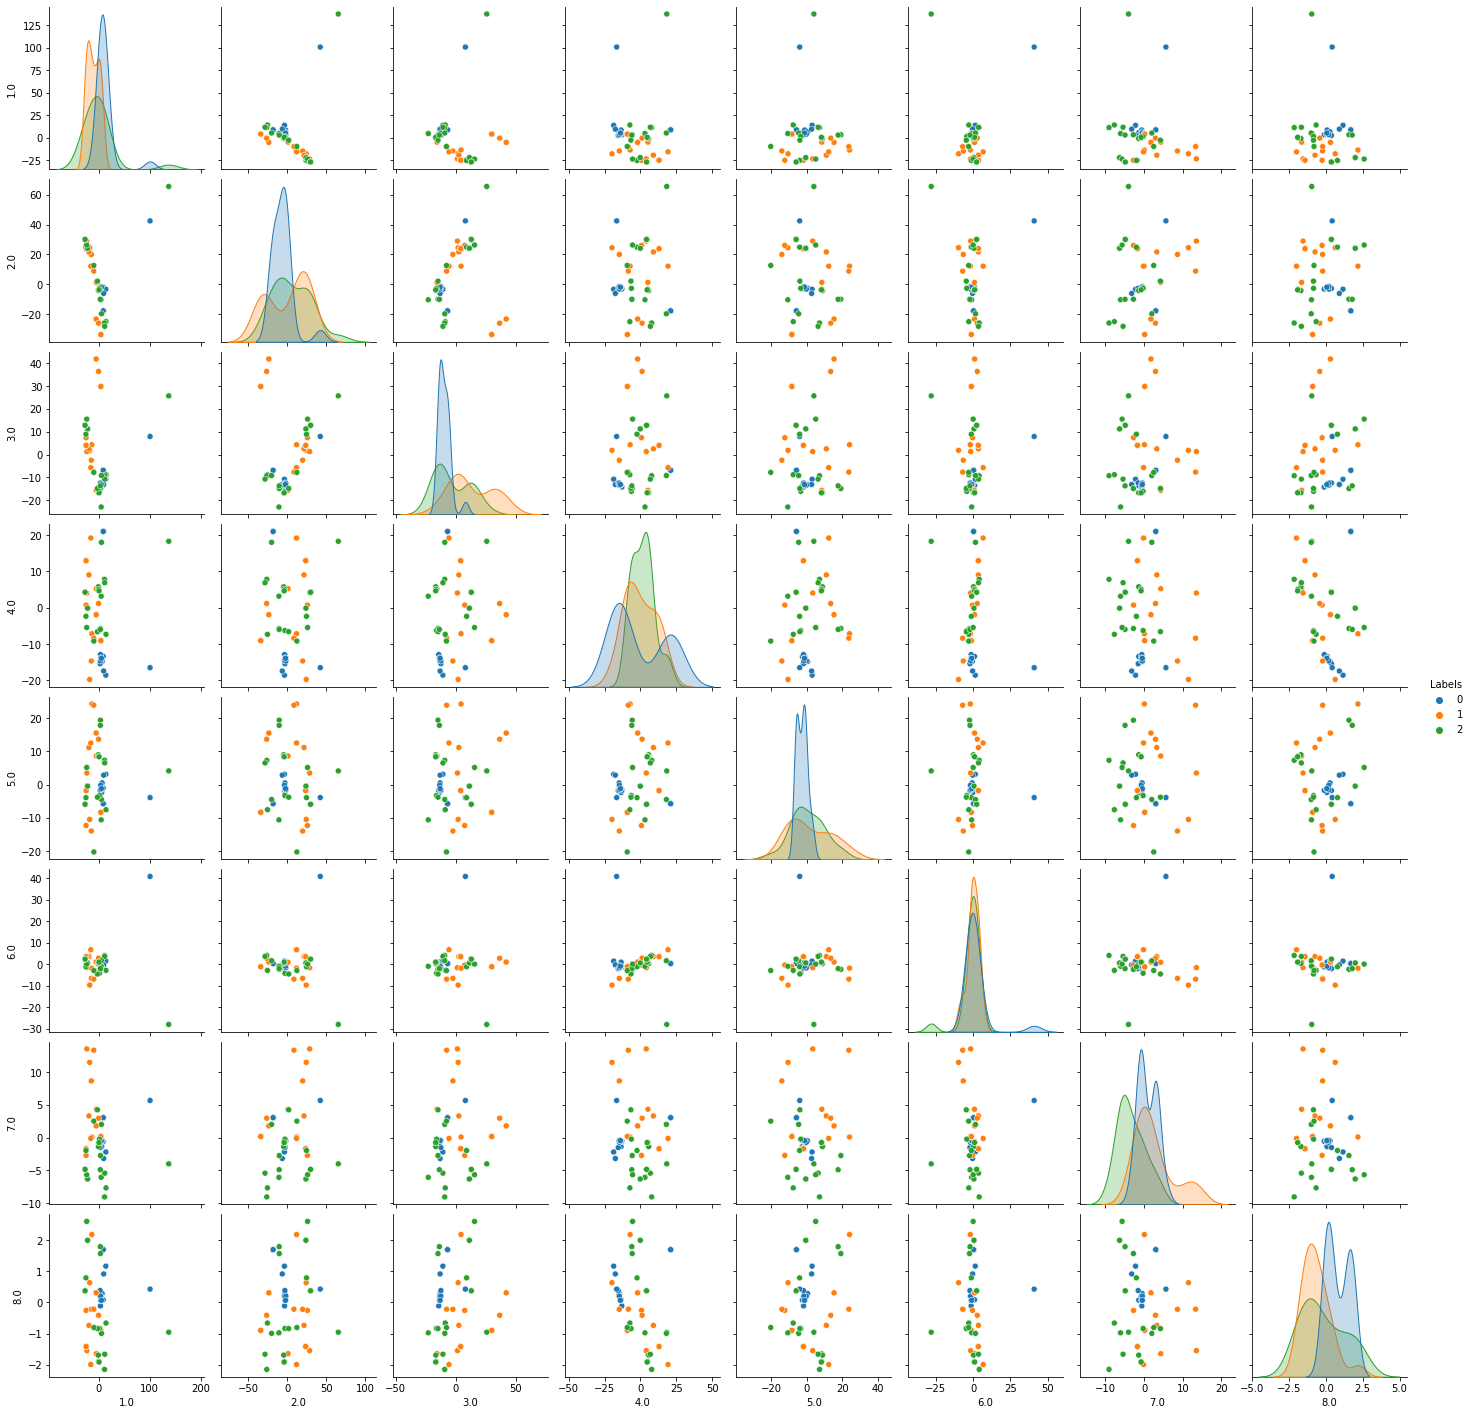

In [ ]:
n = 8
dataFrame = pd.DataFrame(projectedZ_Components(n,dataSismo),columns=np.linspace(1,n,num=n))
dataFrame['Labels'] = Tags
sns.pairplot(dataFrame, hue= 'Labels',palette='tab10')

Tele --> 0
Local --> 1
Reg --> 2

Observación: Es importante mencionar que el color azul corresponde a los telesismos, el color naranja a los sismos locales y el verde a los regionales. En base a los espacios representaciones de los espacios latentes, se aprecia que los datos obtenidos son mas distinguibles que los datos obtenidos en el dataframe del miniproyecto 1, a pesar de esto, los datos no se estan agrupando de la forma esperada. Una solucion para esto podria ser devolver los datos de espacio latente al espacio de entrada y evaluar si los datos se logran agrupar de mejor manera. 

In [ ]:
def Logistic_Regression(X, Y):
  # Dividimos el conjunto de datos en Entrenamiento y Test
  X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 123)

  # Creamos un modelo de Regresión Logística para Clasificación y entrenamos los datos
  logreg = LogisticRegression(C=1e5)
  logreg.fit(X_train, y_train)

  # Luego evaluamos el desempeño del clasificador tanto en entrenamiento cómo en test
  Acc_train = accuracy_score(y_train, logreg.predict(X_train))
  cMat_train = confusion_matrix(y_train, logreg.predict(X_train))

  Acc_test = accuracy_score(y_test, logreg.predict(X_test))
  cMat_test = confusion_matrix(y_test, logreg.predict(X_test))

  print('Acuracy Train: ',Acc_train)
  print('Acuracy Test: ',Acc_test)

  ax1 = ConfusionMatrixDisplay(cMat_train, display_labels=['telesismo','local','regional'])
  ax1.plot()
  plt.show()

  ax2 = ConfusionMatrixDisplay(cMat_test, display_labels=['telesismo','local','regional'])
  ax2.plot()
  plt.show()
  return None

def Bayessian_Regression(X, Y):
  return None


##Regresion Logistica para los datos en el espacio de entrada.

Acuracy Train:  0.7659574468085106
Acuracy Test:  0.875


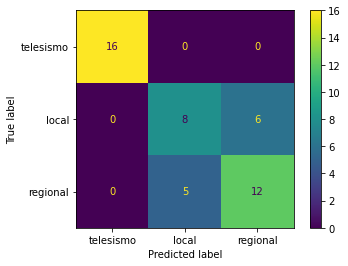

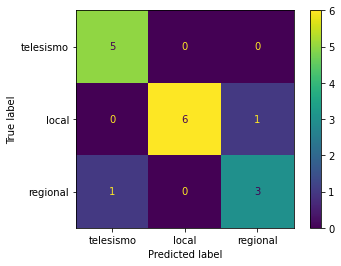

In [ ]:
X = dataSismo[:, 2:4]  # Tomemos como ejemplo las primeras dos dimensiones.
Y = Tags
Logistic_Regression(X, Y)

##Regresion Logistica para los datos en el espacio de latente.



Acuracy Train:  1.0
Acuracy Test:  0.8125


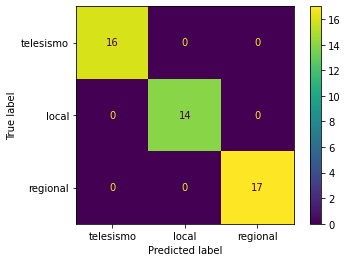

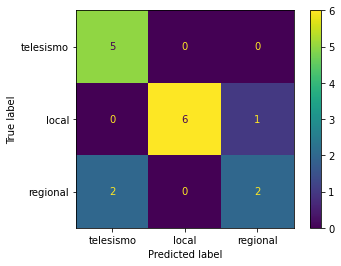

In [ ]:
n = 8
modelPCA = PCA(n_components=n) # Hacemos PCA con n componentes.
X = dataSismo 
X_PCA = modelPCA.fit_transform(X)
Y = Tags
Logistic_Regression(X_PCA, Y)

##Clasificacion Bayesiana para los datos del espacio de entrada.

[[0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.80088061 0.14973543 0.04938396]
 [0.92203631 0.02110902 0.05685467]
 [0.92455685 0.01843306 0.05701009]]
Accuracy:  0.5396825396825397


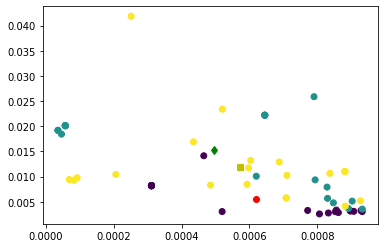

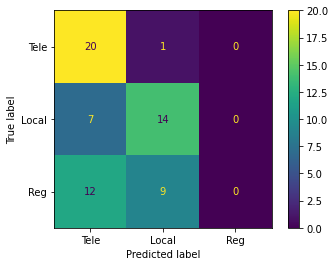

In [ ]:
X = dataSismo[:,6:10]
t = np.array(Tags)
pC1 = np.sum(np.where(t == 0, 1., 0.)) / len(t)
pC2 = np.sum(np.where(t == 1, 1., 0.)) / len(t)
pC3 = np.sum(np.where(t == 2, 1., 0.)) / len(t)

# Seleccionamos los X de la clase 1
X1 = X[t == 0]
mu_C1 = np.mean(X1,axis = 0)
# Seleccionamos los X de la clase 2
X2 = X[t == 1]
mu_C2 = np.mean(X2,axis = 0)
# Seleccionamos los X de la clase 3
X3 = X[t == 2]
mu_C3 = np.mean(X3,axis = 0)

plt.scatter(X[:,0],X[:,1],c = t)
plt.plot(mu_C1[0],mu_C1[1],'or')
plt.plot(mu_C2[0],mu_C2[1],'dg')
plt.plot(mu_C3[0],mu_C3[1],'sy')

N1 = np.sum(np.where(t == 0, 1., 0.))
MU_1 = np.tile(mu_C1,(np.int(N1),1))
S1 = (1/N1)*((X1-MU_1).T)@(X1-MU_1)


N2 = np.sum(np.where(t == 1, 1., 0.))
MU_2 = np.tile(mu_C2,(np.int(N2),1))
S2 = (1/N2)*((X2-MU_2).T)@(X2-MU_2)

N3 = np.sum(np.where(t == 2, 1., 0.))
MU_3 = np.tile(mu_C3,(np.int(N3),1))
S3 = (1/N3)*((X3-MU_3).T)@(X3-MU_3)

N = N1 + N2 + N3
Sigma = (N1/N)*S1 + (N2/N)*S2 + (N3/N)*S3

invSigma = np.linalg.inv(Sigma)
w_C1 = invSigma@mu_C1
w_10 = -0.5*((mu_C1).T)@(invSigma@mu_C1) + np.log(pC1)

w_C2 = invSigma@mu_C2
w_20 = -0.5*((mu_C2).T)@(invSigma@mu_C2) + np.log(pC2)

w_C3 = invSigma@mu_C3
w_30 = -0.5*((mu_C3).T)@(invSigma@mu_C3) + np.log(pC3)

# Para las activaciones

A1 = (X@w_C1 + w_10).reshape(np.int(N),1)
A2 = (X@w_C2 + w_20).reshape(np.int(N),1)
A3 = (X@w_C1 + w_30).reshape(np.int(N),1)

A = np.concatenate((A1,A2,A3),axis = 1)

expA = np.exp(A)
aux = np.sum(expA,axis = 1).reshape(int(N),1)
auxM = np.tile(aux,(1,3))

p_Ck_dado_X =  expA/auxM # Posterior: y_Est

print(p_Ck_dado_X[:10])
# print(np.sum(p_Ck_dado_X,axis = 1))
t_Est = np.argmax(p_Ck_dado_X, axis = 1)

from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

Acc = accuracy_score(t,t_Est)
cMat = confusion_matrix(t,t_Est)

print('Accuracy: ',Acc)

ax = ConfusionMatrixDisplay(cMat, display_labels = ['telesismo','local','regional'])
ax.plot()
plt.show()

##Faces Recognizition##

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=30)
print(faces.target_names)
print(faces.images.shape)
print(faces.data.shape)

['Alejandro Toledo' 'Alvaro Uribe' 'Andre Agassi' 'Ariel Sharon'
 'Arnold Schwarzenegger' 'Colin Powell' 'David Beckham' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Guillermo Coria' 'Hans Blix' 'Hugo Chavez' 'Jacques Chirac'
 'Jean Chretien' 'Jennifer Capriati' 'John Ashcroft' 'John Negroponte'
 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Megawati Sukarnoputri' 'Nestor Kirchner'
 'Recep Tayyip Erdogan' 'Roh Moo-hyun' 'Serena Williams'
 'Silvio Berlusconi' 'Tom Ridge' 'Tony Blair' 'Vicente Fox'
 'Vladimir Putin']
(2370, 62, 47)
(2370, 2914)


Let's take a look at the principal axes that span this dataset.
Because this is a large dataset, we will use ``RandomizedPCA``—it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard ``PCA`` estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000).
We will take a look at the first 150 components:

In [ ]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(faces.data)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=False)

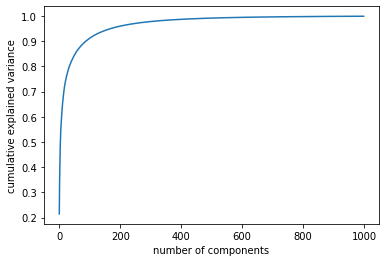

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
#plt.vlines(83,0.,1.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

##Using PCA with Eigen Faces##

In [ ]:
# Compute the components and projected faces

pca = PCA(n_components = 80,svd_solver='randomized').fit(faces.data)
Xfaces = faces.data
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

[  4.6666665   9.333333   16.333334   24.333334   33.666668   40.333332
  52.         72.        112.666664  159.33333  ]
+++++
[[ 4.6666665  9.333333  16.333334  ... 50.666668  48.        44.       ]
 [ 8.333333  13.        14.        ... 55.666668  49.        46.       ]
 [11.        23.333334  25.        ... 57.333332  48.        41.666668 ]
 ...
 [51.666668  55.333332  57.666668  ... 56.333332  57.333332  60.333332 ]
 [50.666668  54.        56.666668  ... 58.333332  59.666668  61.333332 ]
 [50.        53.        55.666668  ... 60.666668  61.666668  63.333332 ]]
(2914,)


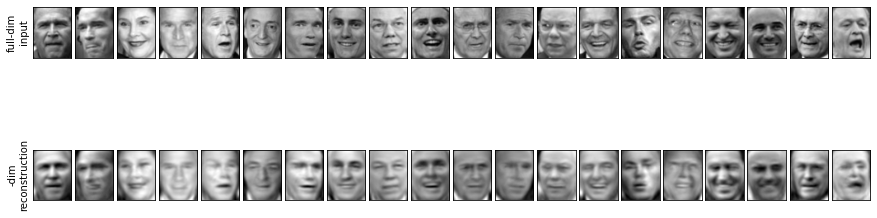

In [ ]:
# Plot the results
fig, ax = plt.subplots(2, 20, figsize=(15,5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
print(faces.data[1,:10])
print("+++++")
a = faces.data[1].reshape(62,47)
print(faces.data[1].reshape(62,47))
print(faces.data[1].shape)
for i in range(20):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('-dim\nreconstruction');

##Conclusiones##

Al observar los rostros en el espacio de entrada y en el espacio latente, podemos apreciar claramente la relación que existe entre el número de componentes y la varianza, ya que inicialmente, cuando tomamos pocas componentes para realizar PCA, no abarcamos un valor de varianza lo suficientemente grande como para hacer que las imagenes representadas sean distinguibles; en cambio, cuanto tomamos un número de componentes muy alto (que cubra mas del 90% de la varianza) los cambios introducidos sobre
las imagenes son casi inapreciables, lo cual se debe a que estas componentes aportan muy poca varianza.